In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-type-classification/Stars.csv


## Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/kaggle/input/star-type-classification/Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
data.shape

(240, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


## Missing Value Analysis

In [5]:
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

#### No Missing Values in the Data

## Duplicates Analysis

In [6]:
data[data.duplicated()]

,Temperature,L,R,A_M,Color,Spectral_Class,Type


#### No Duplicate Values present

## Feature Analysis

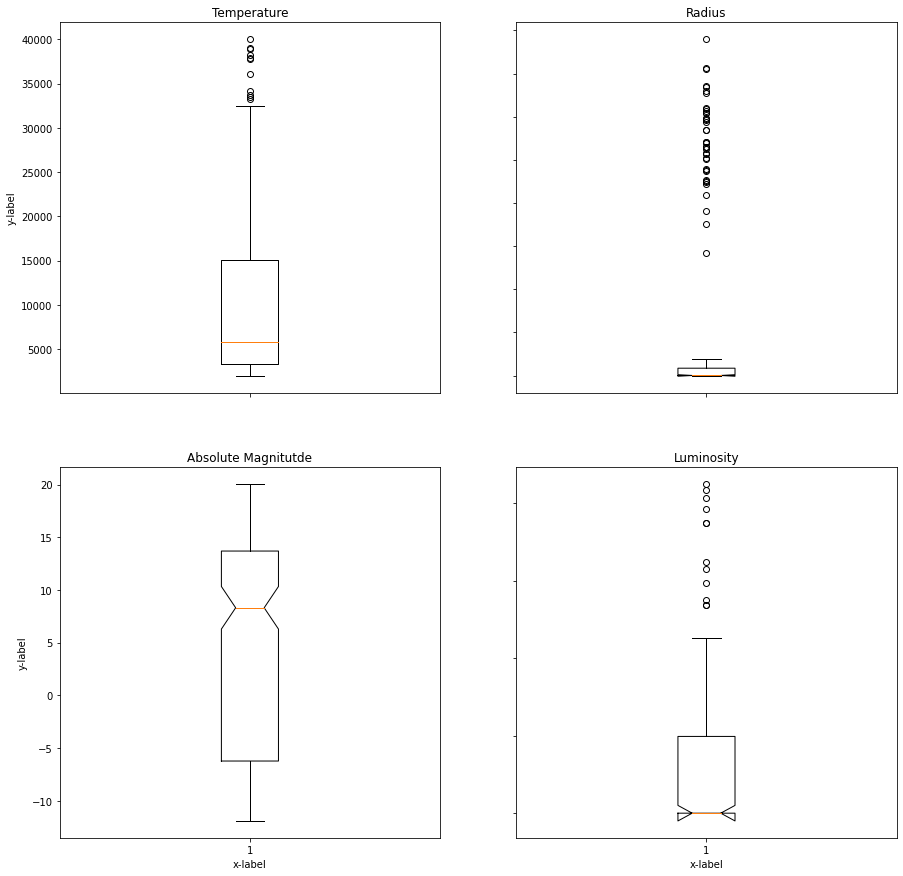

In [7]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].boxplot(data['Temperature'])
axs[0, 0].set_title('Temperature')
axs[0, 1].boxplot(data['R'], 'tab:orange')
axs[0, 1].set_title('Radius')
axs[1, 0].boxplot(data['A_M'], 'tab:green')
axs[1, 0].set_title('Absolute Magnitutde')
axs[1, 1].boxplot(data['L'], 'tab:red')
axs[1, 1].set_title('Luminosity')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Star Color Analysis

Text(0.5, 1.0, 'Star Color Analysis')

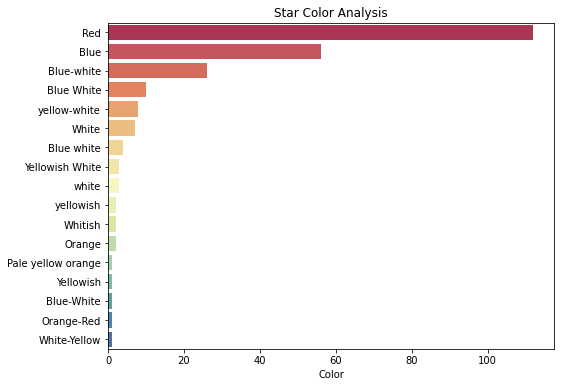

In [8]:
a= pd.DataFrame(data['Color'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(a['Color'], a.index, palette= 'Spectral')
plt.title("Star Color Analysis")

#### 112 stars have Red color & 56 stars have Blue color

## Star Spectral Class Analysis

Text(0.5, 1.0, 'Star Spectral Class Analysis')

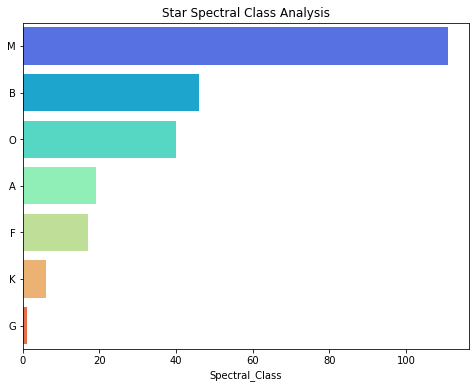

In [9]:
a= pd.DataFrame(data['Spectral_Class'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(a['Spectral_Class'], a.index, palette= 'rainbow')
plt.title("Star Spectral Class Analysis")

#### 111 Stars belong to "M" Spectral Class, making it the most dominant class in the sample

## Star Type Analysis

Text(0.5, 1.0, 'Percentage Distribution of Star Type')

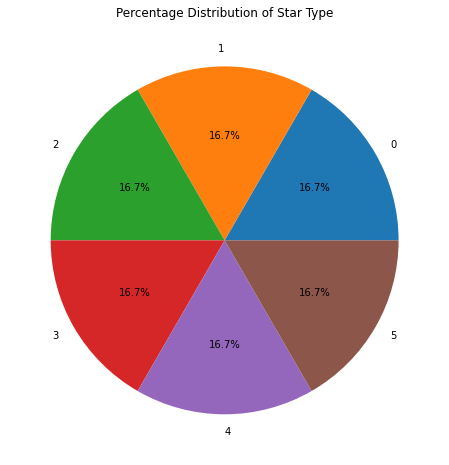

In [10]:
a =pd.DataFrame(data['Type'].value_counts())
plt.figure(figsize=(10,8))
plt.pie(a['Type'],labels=a.index,autopct='%1.1f%%')
plt.title("Percentage Distribution of Star Type")

#### It is seen that the comprises of equal distribution of Star Types

## Correlation Analysis

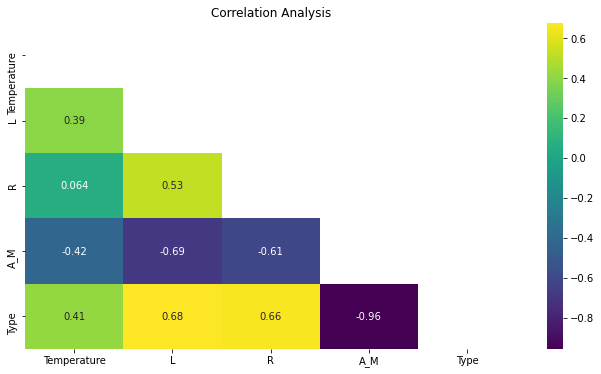

In [11]:
matrix= data.corr()
mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True


plt.figure(figsize=(11,6))
sns.heatmap(matrix,annot=True,cmap='viridis',annot_kws = {'size': 10},mask=mask)
plt.title("Correlation Analysis")
plt.show()

- There is a Moderate Positive Correlation between Luminosity-Temperature and Star Type-Temperature
- Moderately High Positive Correlation is seen between Lumionsity-Radius, Luminosity-Star Type & Radius- Star Type
- Moderately High Negatively Correlation is seen between Lumionsity-Magnitude & Radius-Magnitude
- Strong Negative Correlation is seen between Magnitude & Star Type

## Star Classification Analysis

In [12]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()  
data['Spectral_Class']= x1.fit_transform(data['Spectral_Class'])
data['Color']= x1.fit_transform(data['Color'])

Y= data[['Type']]
X= data.drop(['Type'], axis=1)

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

### Logistic Regression

In [13]:
LogReg= LogisticRegression()
LogReg= LogReg.fit(x_train,y_train)
y_pred= LogReg.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.9375
Confusion Matrix: 
[[8 0 0 0 0 0]
 [1 7 0 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 6 2 0]
 [0 0 0 0 8 0]
 [0 0 0 0 0 8]]


In [14]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


LogReg= multiclass_roc_auc_score(y_test,y_pred)
LogReg

0.9624999999999999

### KNN 

In [15]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred= knn.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.5416666666666666
Confusion Matrix: 
[[5 3 0 0 0 0]
 [3 5 0 0 0 0]
 [0 0 5 3 0 0]
 [0 0 3 4 1 0]
 [0 0 0 0 4 4]
 [0 0 0 0 5 3]]


In [16]:
KNN=multiclass_roc_auc_score(y_test,y_pred)
KNN

0.7250000000000001

### Decision Tree

In [17]:
dtc= DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)

y_pred= dtc.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  1.0
Confusion Matrix: 
[[8 0 0 0 0 0]
 [0 8 0 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 8 0]
 [0 0 0 0 0 8]]


In [18]:
DT=multiclass_roc_auc_score(y_test,y_pred)
DT

1.0

### Random Forest

In [19]:
rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)

y_pred= rf.predict(x_test)
print("Accuracy Score RandomForest: ",metrics.accuracy_score(y_test,y_pred))

cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score RandomForest:  1.0
Confusion Matrix: 
[[8 0 0 0 0 0]
 [0 8 0 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 8 0]
 [0 0 0 0 0 8]]


In [20]:
RF= multiclass_roc_auc_score(y_test,y_pred)
RF

1.0

### Ada Boost Classifier

In [21]:
ada= AdaBoostClassifier(n_estimators=200,random_state=0)
ada.fit(x_train,y_train)

y_pred= ada.predict(x_test)
print("Accuracy Score of AdaBoost Classifier: ",metrics.accuracy_score(y_test,y_pred))

cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score of AdaBoost Classifier:  0.6666666666666666
Confusion Matrix: 
[[8 0 0 0 0 0]
 [0 8 0 0 0 0]
 [0 0 8 0 0 0]
 [0 8 0 0 0 0]
 [0 8 0 0 0 0]
 [0 0 0 0 0 8]]


In [22]:
AB= multiclass_roc_auc_score(y_test,y_pred)
AB

0.7999999999999999

### Gradient Boost Classifiier

In [23]:
gradient= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
gradient.fit(x_train,y_train)

y_pred= gradient.predict(x_test)
print("Accuracy Score of GradientBoost Classifier: ",metrics.accuracy_score(y_test,y_pred))

cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score of GradientBoost Classifier:  1.0
Confusion Matrix: 
[[8 0 0 0 0 0]
 [0 8 0 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 8 0]
 [0 0 0 0 0 8]]


In [24]:
GB= multiclass_roc_auc_score(y_test,y_pred)
GB

1.0

### Model Comparison

Text(0.5, 1.0, 'ML Model Comparison')

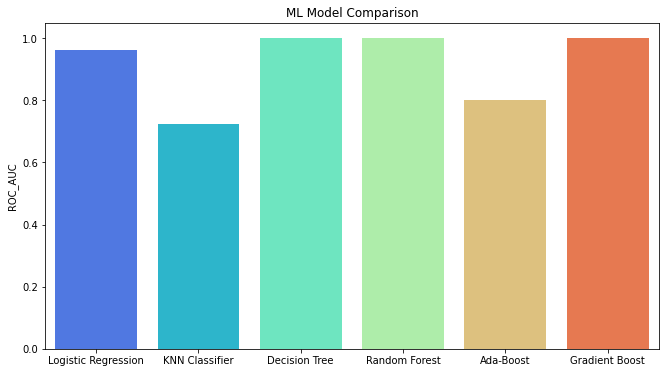

In [25]:
mc= pd.DataFrame([LogReg,KNN,DT,RF,AB,GB],['Logistic Regression','KNN Classifier','Decision Tree','Random Forest','Ada-Boost','Gradient Boost'])
mc.columns=['ROC_AUC']
mc

plt.figure(figsize=(11,6))
sns.barplot(mc.index,mc.ROC_AUC,palette='rainbow')
plt.title('ML Model Comparison')

### It is seen that Random Forest, Decision Tree & Gradient Boost Classifiers give the best Classification Performance